**Train DNN using MNIST Data**

In [ ]:
### IMport libraries
import numpy as np
import tqdm
import copy
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Define transformations for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Hyper-parameters
input_size = 784 # 28x28
n_epo = 100
batch_size = 64


# Load the dataset
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 67365306.11it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 30291496.33it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 24810194.71it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5049172.75it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



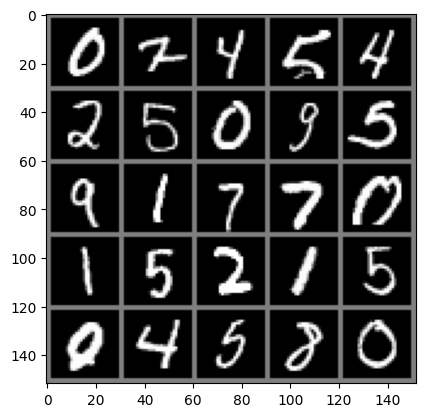

In [ ]:
#Plot data
def imshow(imgs):
  imgs = imgs / 2 + 0.5
  npimgs = imgs.numpy()
  plt.imshow(np.transpose(npimgs, (1, 2, 0)))
  plt.show()

# Get the next batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Create a grid of images
img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)

# Display the grid
imshow(img_grid)

**Define three DNN models**

In [ ]:
## Model 1
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.view(-1, input_size)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



##Model 2
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.view(-1, input_size)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x



##Model 3
class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.view(-1, input_size)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x



**Deifine train and test function**

In [ ]:
# Function to compute test accuracy
def test_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    with torch.no_grad():  # No need to compute gradients during evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to device
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total

    return accuracy

# Training function with testing
def train_model(model, optimizer, train_loader, test_loader, criterion, epochs=100):
    train_losses = []
    train_accuracy = []
    test_accuracy = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model.to(device)
        # Training
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to device
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct / total
        train_losses.append(epoch_loss)
        train_accuracy.append(epoch_accuracy)

        # Testing
        test_acc = test_model(model, test_loader)
        test_accuracy.append(test_acc)

       # print(f"Epoch {epoch+1}/{epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, Test Accuracy: {test_acc:.4f}")

    return train_losses, train_accuracy, test_accuracy

**Train models**

In [ ]:
###  Model 1
model1 = Model1()
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(model1.parameters(), lr = 1e-3, weight_decay = 1e-4)
model1_params = sum(p.numel() for p in model1.parameters())
print(f'Nunber of parameter for model 1 is: {model1_params}')
train_losses1, train_accuracy1, test_accuracy1 = train_model(model1, optimizer1, train_loader, test_loader, criterion)


###  Model 2
model2 = Model2()
criterion = nn.CrossEntropyLoss()
optimizer2 = optim.Adam(model2.parameters(), lr = 1e-3, weight_decay = 1e-4)
model2_params = sum(p.numel() for p in model2.parameters())
print(f'Nunber of parameter for model 2 is: {model2_params}')
train_losses2, train_accuracy2, test_accuracy2 = train_model(model2, optimizer2, train_loader, test_loader, criterion)

###  Model 3
model3 = Model3()
criterion = nn.CrossEntropyLoss()
optimizer3 = optim.Adam(model3.parameters(), lr = 1e-3, weight_decay = 1e-4)
model3_params = sum(p.numel() for p in model3.parameters())
print(f'Nunber of parameter for model 3 is: {model3_params}')
train_losses3, train_accuracy3, test_accuracy3 = train_model(model3, optimizer3, train_loader, test_loader, criterion)

Nunber of parameter for model 1 is: 52650
Nunber of parameter for model 2 is: 111146
Nunber of parameter for model 3 is: 244522


**Plot Training Loss**

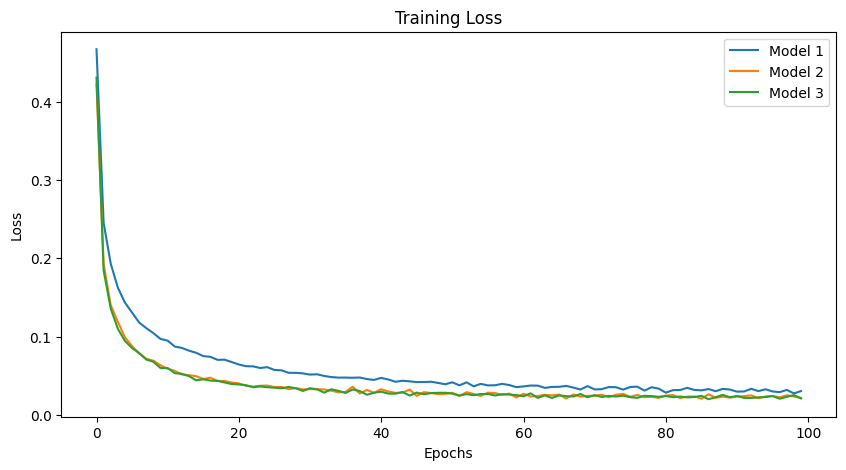

In [ ]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses1, label='Model 1')
plt.plot(train_losses2, label='Model 2')
plt.plot(train_losses3, label='Model 3')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



**Plot Test and Training Accuracies**

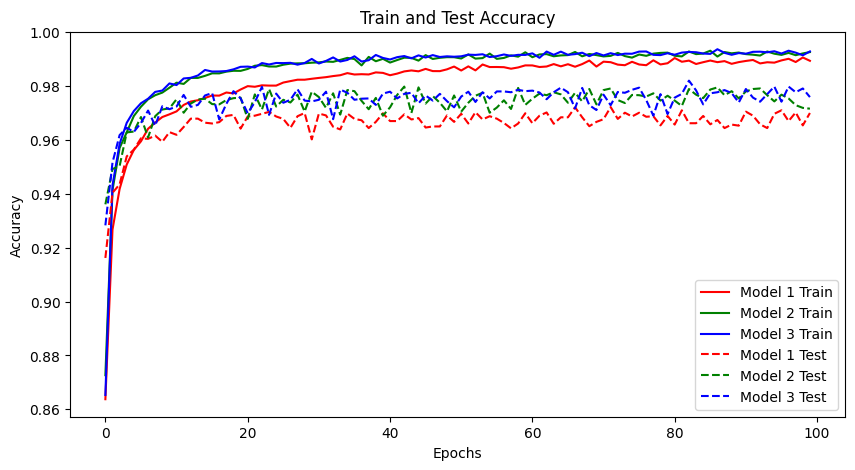

In [ ]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy1, label='Model 1 Train', color='r')
plt.plot(train_accuracy2, label='Model 2 Train', color='g')
plt.plot(train_accuracy3, label='Model 3 Train', color='b')
plt.plot(test_accuracy1, label='Model 1 Test', color='r', linestyle='--')
plt.plot(test_accuracy2, label='Model 2 Test', color='g', linestyle='--')
plt.plot(test_accuracy3, label='Model 3 Test', color='b', linestyle='--')
plt.title('Train and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Average accuracy and loss**

In [ ]:
def avg(a):
  a= round(100*(sum(a)/len(a)),2)
  return a


In [ ]:
##Average training accuracy
avg(train_accuracy1) ,avg(train_accuracy2),avg(train_accuracy3)

(98.15, 98.68, 98.73)

In [ ]:
##Average testing accuracy
avg(test_accuracy1) ,avg(test_accuracy2),avg(test_accuracy3)

(96.6, 97.36, 97.44)

In [ ]:
##Average training loss
avg(train_losses1)/100 ,avg(train_losses2)/100,avg(train_losses3)/100

(0.0576, 0.04, 0.0392)